In [4]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
btc = web.get_data_yahoo('BTC-JPY', start=datetime.datetime(2017, 1, 1), end=datetime.datetime(2017, 12, 27))
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-31,114959.820312,112244.687500,114370.312500,114187.640625,6428389520,114187.640625
2017-01-01,119703.898438,114161.640625,114187.640625,119284.828125,5573200293,119284.828125
2017-01-02,121815.937500,117522.820312,119284.828125,120478.906250,8623409950,120478.906250
2017-01-03,122292.609375,120485.109375,120478.906250,122041.523438,8532909083,122041.523438
2017-01-04,139563.546875,121326.023438,122041.523438,138880.234375,23742950492,138880.234375


In [6]:
np.sum(btc['Close'] - btc['Adj Close'])

0.0

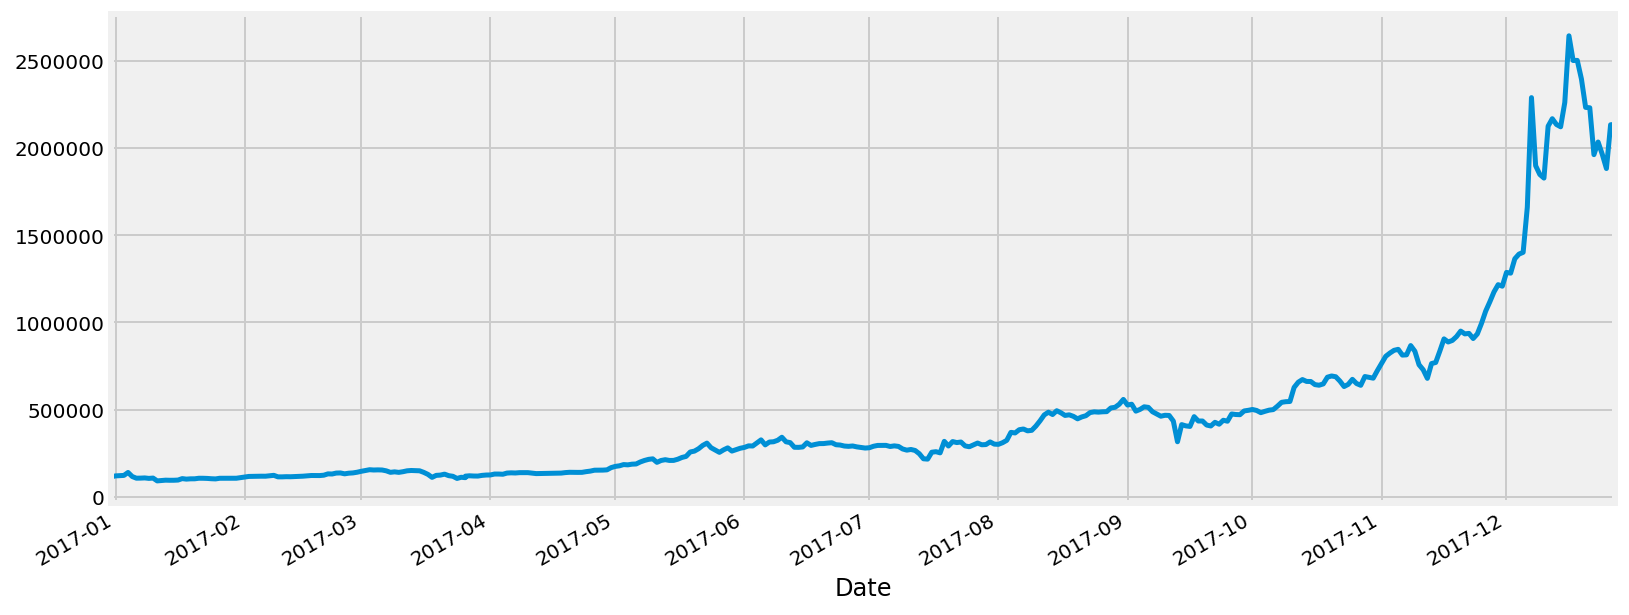

In [7]:
btc_adj = btc['Adj Close']
btc_adj.plot(lw=2.5, figsize=(12, 5))
plt.show()

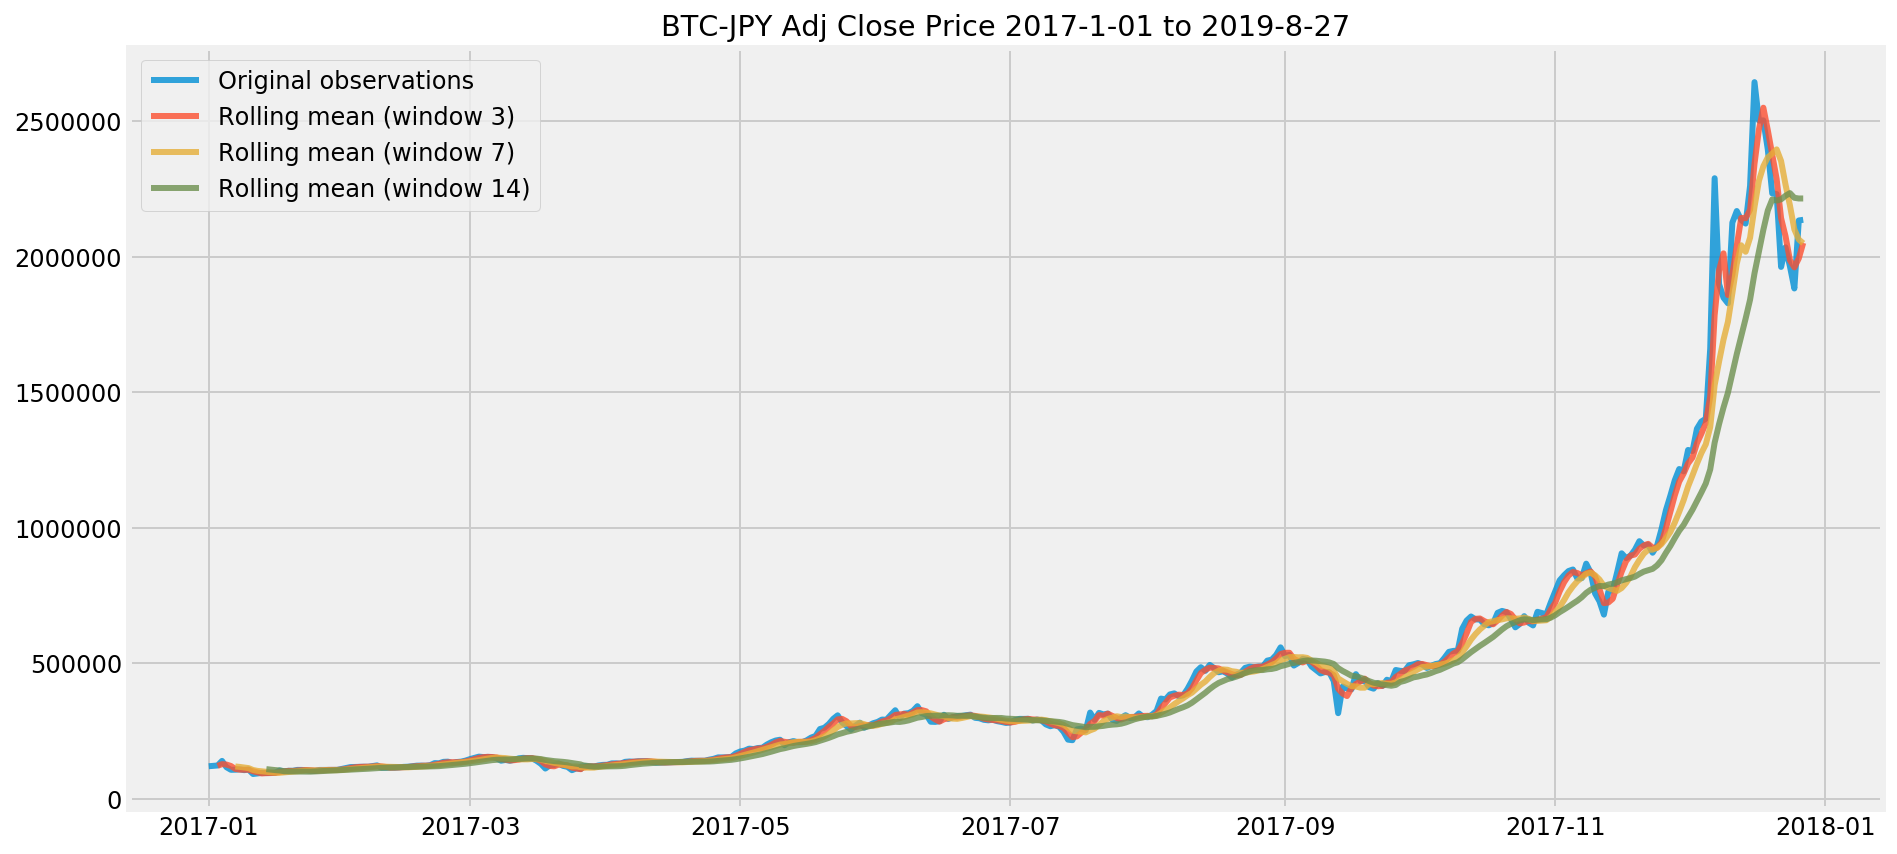

In [9]:
btc_recent = btc_adj.loc['2017-1-01':'2019-8-27']
rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()
plt.figure(figsize=(14, 7))
plt.plot(btc_recent.index, btc_recent, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(btc_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(btc_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')
plt.title('BTC-JPY Adj Close Price 2017-1-01 to 2019-8-27')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()